<a href="https://colab.research.google.com/github/yyashaswini736/in2/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[    20  24000]
 [    49 130000]
 [    38  80000]
 [    28  37000]
 [    47 120000]
 [    45 110000]
 [    48 125000]
 [    34  55000]]
[0 1 1 0 1 1 1 1]
[[    40  95000]
 [    36  60000]
 [    22  18000]
 [    39  90000]
 [    37  75000]
 [    27  45000]
 [    32  51000]
 [    29  48000]
 [    21  20000]
 [    50 135000]
 [    35  58000]
 [    31  72000]
 [    41  98000]
 [    42 100000]
 [    25  33000]
 [    24  27000]
 [    46 115000]
 [    23  25000]
 [    19  19000]
 [    33  52000]
 [    30  50000]
 [    26  40000]]
[0 1 1 0 1 1 1 1]
[0]
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]
[[2 0]
 [0 6]]
1.0


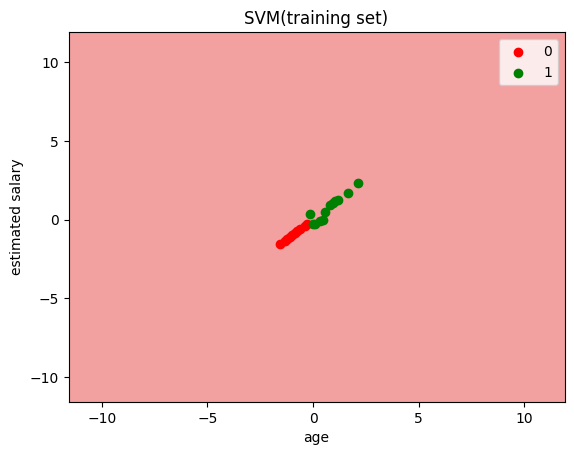

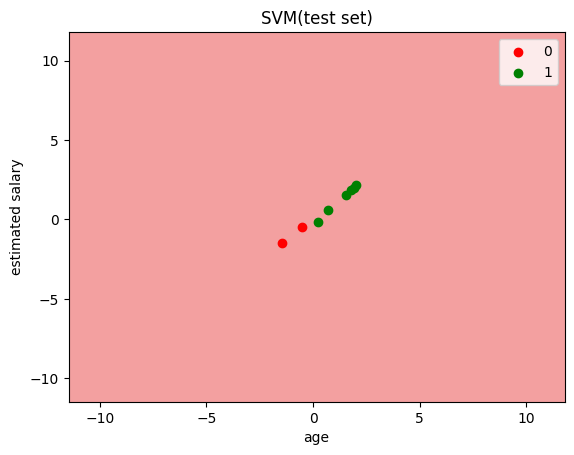

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv("/content/age_salary_purchase_250.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_test)
print(y_test)
print(x_train)
print(y_test)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn .svm import SVC
classifier=SVC(kernel="linear",random_state=0)
classifier.fit(x_train,y_train)
print(classifier.predict(sc.transform([[30,7000]])))
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-10,stop=x_set[:,0].max()+10,step=0.25),
                  np.arange(start=x_set[:,0].min()-10,stop=x_set[:,0].max()+10,step=0.25))
plt.contourf(x1,x2,classifier.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('lightcoral','lightgreen')))
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,i],color=ListedColormap(('red','green'))(i),label=j)
plt.title("SVM(training set)")
plt.xlabel("age")
plt.ylabel("estimated salary")
plt.legend()
plt.show()
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-10,stop=x_set[:,0].max()+10,step=0.25),
                  np.arange(start=x_set[:,0].min()-10,stop=x_set[:,0].max()+10,step=0.25))
plt.contourf(x1,x2,classifier.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('lightcoral','lightgreen')))
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,i],color=ListedColormap(('red','green'))(i),label=j)
plt.title("SVM(test set)")
plt.xlabel("age")
plt.ylabel("estimated salary")
plt.legend()
plt.show()